# Analyse prédictives des données non structurées par l'intelligence artificielle

# Recherche de modèle de Deep learning

Dans la suite nous essayon d'améliorer les performances de notre modèle en travaillant sur les même features sélectionnées dans la démarche machine learning.

# 1.Détermination des features

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
df=pd.read_csv("join_transformed_last1.csv")

In [5]:
# Sélectionner les variables indépendantes (X) et la cible (y)
X = df.drop(columns=["Ntop", "patho_niv1", "cla_age_5","Npop" ,"prev"]) 

y = df["Ntop"]  # colonne cible

# Séparation en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialiser et entraîner le modèle de régression linéaire
model = LGBMRegressor()
model.fit(X_train, y_train)

# Prédictions sur l'ensemble de test
y_pred = model.predict(X_test)

# Évaluer la performance du modèle
mse=mean_squared_error(y_test, y_pred) 
rmse =np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)  # R²

# Affichage des résultats
print(f"RMSE : {rmse}")
print(f"R² : {r2}")

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.135397 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1876
[LightGBM] [Info] Number of data points in the train set: 838860, number of used features: 59
[LightGBM] [Info] Start training from score -0.000225
RMSE : 0.4810564805217435
R² : 0.7694146964145666


In [6]:
import numpy as np

# Importance des caractéristiques
importances = model.feature_importances_

# Trier les caractéristiques par ordre décroissant
sorted_indices = np.argsort(importances)[::-1]
sorted_importances = importances[sorted_indices]

# Les noms des caractéristiques
booster = model.booster_
feature_names = booster.feature_name()
sorted_feature_names = [feature_names[i] for i in sorted_indices]

# Créer un DataFrame avec les caractéristiques et leur importance
feature_importance_df = pd.DataFrame({'Feature': sorted_feature_names, 'Importance':sorted_importances})
print(feature_importance_df.head(10))

           Feature  Importance
0         cyclepds         652
1           region         518
2             dept         516
3            annee         337
4             mois         149
5             pm10          91
6  carbon_monoxide          47
7      poids_moyen          40
8   regime_special          38
9         p_animal          33


In [7]:
# Sélectionner les 30 premières caractéristiques les plus importantes
top_30_indices = sorted_indices[:30]
top_30_feature_names = sorted_feature_names[:30]

# Créer un DataFrame avec les 30 caractéristiques les plus importantes
top_30_features = pd.DataFrame({
    'Feature': top_30_feature_names, 
    'Importance': sorted_importances[:30]
})

#  Sélectionner ces 30 caractéristiques dans X
X_top_30 = df[top_30_feature_names]
print(X_top_30.columns)

#  Séparer à nouveau les ensembles d'entraînement et de test avec les 30 caractéristiques sélectionnées
X_train_top_30, X_test_top_30, y_train, y_test = train_test_split(X_top_30, y, test_size=0.2, random_state=42)

# Réentraîner le modèle avec les 30 caractéristiques les plus importantes
model_top_30 = LGBMRegressor()
model_top_30.fit(X_train_top_30, y_train)

# Prédictions sur l'ensemble de test
y_pred_top_30 = model_top_30.predict(X_test_top_30)

# Évaluation de la performance du modèle
mse = mean_squared_error(y_test, y_pred_top_30)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_top_30)

# Affichage des résultats
print(f"RMSE avec les 30 caractéristiques les plus importantes : {rmse}")
print(f"R² avec les 30 caractéristiques les plus importantes : {r2}")

Index(['cyclepds', 'region', 'dept', 'annee', 'mois', 'pm10',
       'carbon_monoxide', 'poids_moyen', 'regime_special', 'p_animal',
       'agglo9', 'entrerep', 'fastfood', 'ozone', 'dip', 'sulphur_dioxide',
       'temps_act_phy', 'sedentaire', 'sexeps', 'vistes_medecins', 'pm2_5',
       'taille', 'bmi', 'situ_prof', 'grass_pollen', 'enrich', 'heur_trav',
       'situ_mat', 'nitrogen_dioxide', 'fqvpo'],
      dtype='object')
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.114741 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1570
[LightGBM] [Info] Number of data points in the train set: 838860, number of used features: 30
[LightGBM] [Info] Start training from score -0.000225
RMSE avec les 30 caractéristiques les plus importantes : 0.4805373345943286
R² avec les 30 caractéristiques les plus importantes : 0.7699121133843835


# 2. Test des modèles MLP,CNN, RNN, LSTM

Dans la suite nous testons les performances des modèles, MLP, CNN,RNN et LSTM

In [11]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, RNN, Conv1D, Flatten, MaxPooling1D, Input
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split


# ===========================
# 1. MLP (Perceptron multicouche)
# ===========================

def build_mlp(input_dim):
    model = Sequential()
    model.add(Input(shape=(input_dim,)))  # Ajout de l'objet Input comme première couche
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(1))  # Régression => Pas de fonction d'activation dans la couche de sortie
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])
    return model

print("Training MLP model...")
mlp_model = build_mlp(X_train_top_30.shape[1])

# Entraînement
history_mlp = mlp_model.fit(X_train_top_30, y_train, epochs=50, batch_size=32, verbose=1, validation_data=(X_test_top_30, y_test))

# Prédictions et évaluation
y_pred_mlp = mlp_model.predict(X_test_top_30)
mse_mlp = mean_squared_error(y_test, y_pred_mlp)
rmse_mlp = np.sqrt(mse_mlp)
r2_mlp = r2_score(y_test, y_pred_mlp)

# ===========================
# 2. Réseau de Neurones Convolutifs (CNN)
# ===========================

def build_cnn(input_shape):
    model = Sequential()
    model.add(Input(shape=input_shape)) 
    model.add(Conv1D(64, 3, activation='relu'))
    model.add(MaxPooling1D(2))
    model.add(Conv1D(32, 3, activation='relu'))
    model.add(MaxPooling1D(2))
    model.add(Flatten())
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1))  
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])  # adam ajuste automatiquement le taux d'apprentissage
    return model

print("Training CNN model...")
# Reshaping pour CNN (Conv1D attend un tableau 3D)
X_train_cnn = np.expand_dims(X_train_top_30, axis=-1)
X_test_cnn = np.expand_dims(X_test_top_30, axis=-1)

cnn_model = build_cnn(X_train_cnn.shape[1:])

# Entraînement
history_cnn = cnn_model.fit(X_train_cnn, y_train, epochs=50, batch_size=32, verbose=1, validation_data=(X_test_cnn, y_test))

# Prédictions et évaluation
y_pred_cnn = cnn_model.predict(X_test_cnn)
mse_cnn = mean_squared_error(y_test, y_pred_cnn)
rmse_cnn = np.sqrt(mse_cnn)
r2_cnn = r2_score(y_test, y_pred_cnn)


Training MLP model...
Epoch 1/50
26215/26215 ━━━━━━━━━━━━━━━━━━━━ 114s 4ms/step - loss: 0.3693 - mae: 0.2790 - val_loss: 0.2638 - val_mae: 0.2127
Epoch 2/50
26215/26215 ━━━━━━━━━━━━━━━━━━━━ 120s 3ms/step - loss: 0.2433 - mae: 0.2153 - val_loss: 0.2382 - val_mae: 0.2104
Epoch 3/50
26215/26215 ━━━━━━━━━━━━━━━━━━━━ 168s 4ms/step - loss: 0.2386 - mae: 0.2108 - val_loss: 0.2364 - val_mae: 0.2098
Epoch 4/50
26215/26215 ━━━━━━━━━━━━━━━━━━━━ 72s 3ms/step - loss: 0.2397 - mae: 0.2097 - val_loss: 0.2368 - val_mae: 0.2085
Epoch 5/50
26215/26215 ━━━━━━━━━━━━━━━━━━━━ 68s 3ms/step - loss: 0.2369 - mae: 0.2078 - val_loss: 0.2414 - val_mae: 0.2011
Epoch 6/50
26215/26215 ━━━━━━━━━━━━━━━━━━━━ 66s 2ms/step - loss: 0.2392 - mae: 0.2073 - val_loss: 0.2353 - val_mae: 0.2016
Epoch 7/50
26215/26215 ━━━━━━━━━━━━━━━━━━━━ 88s 3ms/step - loss: 0.2325 - mae: 0.2056 - val_loss: 0.2355 - val_mae: 0.2069
Epoch 8/50
26215/26215 ━━━━━━━━━━━━━━━━━━━━ 66s 3ms/step - loss: 0.2325 - mae: 0.2051 - val_loss: 0.2366 - val_mae

In [16]:
from tensorflow.keras.layers import SimpleRNN
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# ===========================
# 3. Réseau de Neurones Récurrent (RNN)
# ===========================

def build_rnn(input_shape):
    model = Sequential()
    model.add(Input(shape=input_shape))  # Ajout de l'objet Input
    model.add(SimpleRNN(64, activation='relu', return_sequences=False))  # simpleRNN  pour garder les états précedents
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1))  # Régression => Pas de fonction d'activation dans la couche de sortie
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])
    return model

print("Training RNN model...")

# Reshaping pour RNN (samples, timesteps, features)
X_train_rnn = np.expand_dims(X_train_top_30, axis=1)
X_test_rnn = np.expand_dims(X_test_top_30, axis=1)

rnn_model = build_rnn(X_train_rnn.shape[1:])

# Entraînement
history_rnn = rnn_model.fit(X_train_rnn, y_train, epochs=50, batch_size=32, verbose=1, validation_data=(X_test_rnn, y_test))

# Prédictions et évaluation
y_pred_rnn = rnn_model.predict(X_test_rnn)
mse_rnn = mean_squared_error(y_test, y_pred_rnn)
rmse_rnn = np.sqrt(mse_rnn)
r2_rnn = r2_score(y_test, y_pred_rnn)

# Affichage des résultats
print(f"RNN - RMSE: {rmse_rnn}, R²: {r2_rnn}, MSE: {mse_rnn}")



Training RNN model...
Epoch 1/50
26215/26215 ━━━━━━━━━━━━━━━━━━━━ 39s 1ms/step - loss: 0.4121 - mae: 0.3187 - val_loss: 0.2636 - val_mae: 0.2273
Epoch 2/50
26215/26215 ━━━━━━━━━━━━━━━━━━━━ 38s 1ms/step - loss: 0.2510 - mae: 0.2238 - val_loss: 0.2479 - val_mae: 0.2217
Epoch 3/50
26215/26215 ━━━━━━━━━━━━━━━━━━━━ 36s 1ms/step - loss: 0.2420 - mae: 0.2110 - val_loss: 0.2371 - val_mae: 0.2087
Epoch 4/50
26215/26215 ━━━━━━━━━━━━━━━━━━━━ 34s 1ms/step - loss: 0.2393 - mae: 0.2076 - val_loss: 0.2356 - val_mae: 0.2047
Epoch 5/50
26215/26215 ━━━━━━━━━━━━━━━━━━━━ 37s 1ms/step - loss: 0.2355 - mae: 0.2052 - val_loss: 0.2337 - val_mae: 0.2037
Epoch 6/50
26215/26215 ━━━━━━━━━━━━━━━━━━━━ 35s 1ms/step - loss: 0.2365 - mae: 0.2046 - val_loss: 0.2341 - val_mae: 0.2027
Epoch 7/50
26215/26215 ━━━━━━━━━━━━━━━━━━━━ 35s 1ms/step - loss: 0.2374 - mae: 0.2045 - val_loss: 0.2342 - val_mae: 0.2065
Epoch 8/50
26215/26215 ━━━━━━━━━━━━━━━━━━━━ 67s 3ms/step - loss: 0.2343 - mae: 0.2036 - val_loss: 0.2356 - val_mae: 0

In [15]:
# ===========================
# 4. LSTM (Long Short-Term Memory)
# ===========================

def build_lstm(input_shape):
    model = Sequential()
    model.add(Input(shape=input_shape))  
    model.add(LSTM(64, activation='relu', return_sequences=False))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1))  # Régression 
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])
    return model

print("Training LSTM model...")
# LSTM nécessite des données en 3D (samples, timesteps, features)
X_train_lstm = np.expand_dims(X_train_top_30, axis=1)
X_test_lstm = np.expand_dims(X_test_top_30, axis=1)

lstm_model = build_lstm(X_train_lstm.shape[1:])

# Entraînement
history_lstm = lstm_model.fit(X_train_lstm, y_train, epochs=50, batch_size=32, verbose=1, validation_data=(X_test_lstm, y_test))

# Prédictions et évaluation
y_pred_lstm = lstm_model.predict(X_test_lstm)
mse_lstm = mean_squared_error(y_test, y_pred_lstm)
rmse_lstm = np.sqrt(mse_lstm)
r2_lstm = r2_score(y_test, y_pred_lstm)


Training LSTM model...
Epoch 1/50
26215/26215 ━━━━━━━━━━━━━━━━━━━━ 44s 2ms/step - loss: 0.3367 - mae: 0.2603 - val_loss: 0.2629 - val_mae: 0.2221
Epoch 2/50
26215/26215 ━━━━━━━━━━━━━━━━━━━━ 48s 2ms/step - loss: 0.2380 - mae: 0.2097 - val_loss: 0.2355 - val_mae: 0.2045
Epoch 3/50
26215/26215 ━━━━━━━━━━━━━━━━━━━━ 44s 2ms/step - loss: 0.2398 - mae: 0.2077 - val_loss: 0.2348 - val_mae: 0.2022
Epoch 4/50
26215/26215 ━━━━━━━━━━━━━━━━━━━━ 42s 2ms/step - loss: 0.2362 - mae: 0.2061 - val_loss: 0.2374 - val_mae: 0.2100
Epoch 5/50
26215/26215 ━━━━━━━━━━━━━━━━━━━━ 42s 2ms/step - loss: 0.2352 - mae: 0.2042 - val_loss: 0.2342 - val_mae: 0.2027
Epoch 6/50
26215/26215 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step - loss: 0.2378 - mae: 0.2044 - val_loss: 0.2413 - val_mae: 0.2075
Epoch 7/50
26215/26215 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step - loss: 0.2316 - mae: 0.2025 - val_loss: 0.2351 - val_mae: 0.2119
Epoch 8/50
26215/26215 ━━━━━━━━━━━━━━━━━━━━ 42s 2ms/step - loss: 0.2340 - mae: 0.2033 - val_loss: 0.2346 - val_mae: 

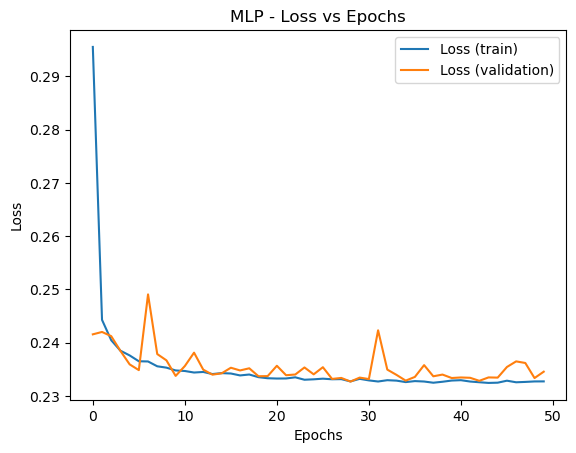

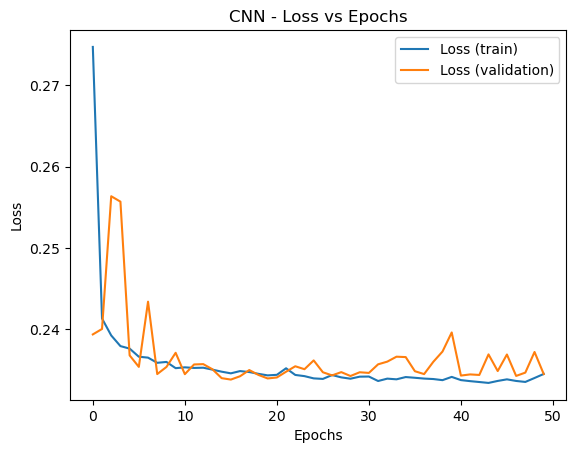

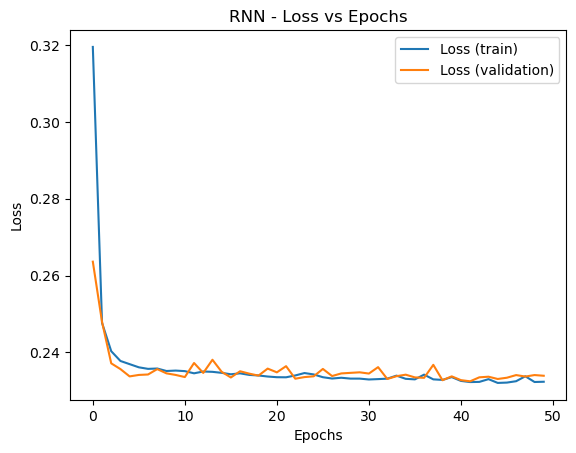

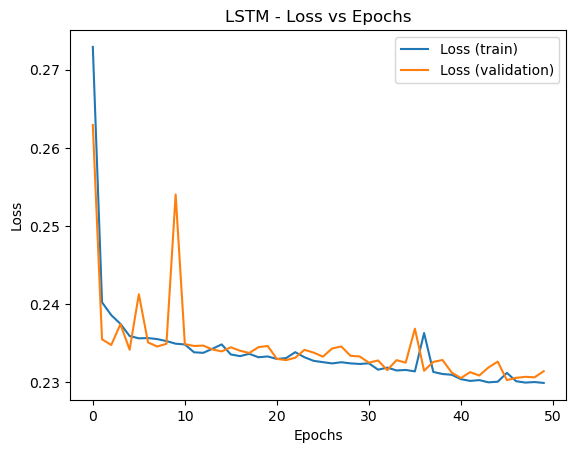

MLP - RMSE: 0.4843082926917997, R²: 0.7662867710345282, MSE: 0.23455452237004595
CNN - RMSE: 0.48425987778346985, R²: 0.7663334959787522, MSE: 0.23450762923086113
RNN - RMSE: 0.48361415545067993, R²: 0.7669562322046863, MSE: 0.2338826513522744
LSTM - RMSE: 0.4810455234178503, R²: 0.7694252004549699, MSE: 0.23140479560035357


In [18]:
# ===========================
# Plotting des résultats
# ===========================

# Fonction pour afficher les résultats
def plot_history(history, model_name):
    plt.plot(history.history['loss'], label='Loss (train)')
    plt.plot(history.history['val_loss'], label='Loss (validation)')
    plt.title(f'{model_name} - Loss vs Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

# Tracer les courbes de perte pour chaque modèle
plot_history(history_mlp, 'MLP')
plot_history(history_cnn, 'CNN')
plot_history(history_rnn, 'RNN')
plot_history(history_lstm, 'LSTM')

# Affichage des résultats de chaque modèle
print(f"MLP - RMSE: {rmse_mlp}, R²: {r2_mlp}, MSE: {mse_mlp}")
print(f"CNN - RMSE: {rmse_cnn}, R²: {r2_cnn}, MSE: {mse_cnn}")
print(f"RNN - RMSE: {rmse_rnn}, R²: {r2_rnn}, MSE: {mse_rnn}")
print(f"LSTM - RMSE: {rmse_lstm}, R²: {r2_lstm}, MSE: {mse_lstm}")

Nous avons observé que, pour les modèles MLP, CNN et LSTM, les courbes de validation présentent des fluctuations par rapport aux courbes d'entraînement, ce qui suggère une possible sur-adaptation (overfitting) du modèle aux données d'entraînement. En revanche, pour le modèle RNN, la courbe de validation suit plus étroitement la tendance de la courbe d'entraînement, avec des variations d'amplitude moins marquées. Cependant, des signes d'overfitting sont également présents et peuvent être améliorés. Afin d'atténuer cette problématique, tous les modèles, y compris le RNN, feront l'objet d'ajustements, notamment par des techniques de régularisation, afin de mieux généraliser et obtenir des performances plus stables sur les données de validation.

# 3. Ajustements des modèles 

In [26]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, RNN, Conv1D, Flatten, MaxPooling1D, Input, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from tensorflow.keras.regularizers import l2


# ===========================
# 1. MLP (Perceptron multicouche)
# ===========================

def build_mlp(input_dim):
    model = Sequential()
    model.add(Input(shape=(input_dim,)))  
    model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))  # L2 Regularization
    model.add(Dropout(0.3))  # Dropout pour éviter le sur-apprentissage
    model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.01)))
    model.add(Dropout(0.3))
    model.add(Dense(16, activation='relu', kernel_regularizer=l2(0.01)))
    model.add(Dense(1))  # Régression
    model.compile(optimizer=Adam(learning_rate=0.0005), loss='mse', metrics=['mae'])
    return model

print("Training MLP model...")
mlp_model = build_mlp(X_train_top_30.shape[1])

# Early stopping pour éviter le sur-apprentissage
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True) # early stopping arrête le modèle de façon précoce pour éviter l'overfitting

# Entraînement avec EarlyStopping
history_mlp = mlp_model.fit(X_train_top_30, y_train, epochs=100, batch_size=32, verbose=1, validation_data=(X_test_top_30, y_test), callbacks=[early_stopping])

# Prédictions et évaluation
y_pred_mlp = mlp_model.predict(X_test_top_30)
mse_mlp = mean_squared_error(y_test, y_pred_mlp)
rmse_mlp = np.sqrt(mse_mlp)
r2_mlp = r2_score(y_test, y_pred_mlp)

# Affichage des résultats
print(f"MLP - RMSE: {rmse_mlp}, R²: {r2_mlp}, MSE: {mse_mlp}")



Training MLP model...
Epoch 1/100
26215/26215 ━━━━━━━━━━━━━━━━━━━━ 34s 1ms/step - loss: 1.2183 - mae: 0.4179 - val_loss: 0.3619 - val_mae: 0.2364
Epoch 2/100
26215/26215 ━━━━━━━━━━━━━━━━━━━━ 33s 1ms/step - loss: 0.3875 - mae: 0.2517 - val_loss: 0.3400 - val_mae: 0.2350
Epoch 3/100
26215/26215 ━━━━━━━━━━━━━━━━━━━━ 33s 1ms/step - loss: 0.3554 - mae: 0.2462 - val_loss: 0.3181 - val_mae: 0.2352
Epoch 4/100
26215/26215 ━━━━━━━━━━━━━━━━━━━━ 34s 1ms/step - loss: 0.3416 - mae: 0.2448 - val_loss: 0.3177 - val_mae: 0.2327
Epoch 5/100
26215/26215 ━━━━━━━━━━━━━━━━━━━━ 34s 1ms/step - loss: 0.3334 - mae: 0.2431 - val_loss: 0.3116 - val_mae: 0.2333
Epoch 6/100
26215/26215 ━━━━━━━━━━━━━━━━━━━━ 41s 1ms/step - loss: 0.3325 - mae: 0.2436 - val_loss: 0.3153 - val_mae: 0.2303
Epoch 7/100
26215/26215 ━━━━━━━━━━━━━━━━━━━━ 34s 1ms/step - loss: 0.3317 - mae: 0.2434 - val_loss: 0.3082 - val_mae: 0.2282
Epoch 8/100
26215/26215 ━━━━━━━━━━━━━━━━━━━━ 35s 1ms/step - loss: 0.3289 - mae: 0.2424 - val_loss: 0.3044 - va

In [27]:
# ===========================
# 2. Réseau de Neurones Convolutifs (CNN)
# ===========================

def build_cnn(input_shape):
    model = Sequential()
    model.add(Input(shape=input_shape))
    model.add(Conv1D(64, 3, activation='relu', kernel_regularizer=l2(0.01)))  # L2 Regularization
    model.add(Dropout(0.3))  # Dropout pour éviter le sur-apprentissage
    model.add(MaxPooling1D(2))
    model.add(Conv1D(32, 3, activation='relu', kernel_regularizer=l2(0.01)))
    model.add(Dropout(0.3))
    model.add(MaxPooling1D(2))
    model.add(Flatten())
    model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.01)))
    model.add(Dropout(0.3))
    model.add(Dense(1))  # Régression
    model.compile(optimizer=Adam(learning_rate=0.0005), loss='mse', metrics=['mae']) # taux d'apprentissage réduit
    return model

print("Training CNN model...")
# Reshaping pour CNN (Conv1D attend un tableau 3D)
X_train_cnn = np.expand_dims(X_train_top_30, axis=-1)
X_test_cnn = np.expand_dims(X_test_top_30, axis=-1)

cnn_model = build_cnn(X_train_cnn.shape[1:])

# Entraînement avec EarlyStopping
history_cnn = cnn_model.fit(X_train_cnn, y_train, epochs=100, batch_size=32, verbose=1, validation_data=(X_test_cnn, y_test), callbacks=[early_stopping])

# Prédictions et évaluation
y_pred_cnn = cnn_model.predict(X_test_cnn)
mse_cnn = mean_squared_error(y_test, y_pred_cnn)
rmse_cnn = np.sqrt(mse_cnn)
r2_cnn = r2_score(y_test, y_pred_cnn)

# Affichage des résultats
print(f"CNN - RMSE: {rmse_cnn}, R²: {r2_cnn}, MSE: {mse_cnn}")



Training CNN model...
Epoch 1/100
26215/26215 ━━━━━━━━━━━━━━━━━━━━ 85s 3ms/step - loss: 0.8182 - mae: 0.3500 - val_loss: 0.4561 - val_mae: 0.2842
Epoch 2/100
26215/26215 ━━━━━━━━━━━━━━━━━━━━ 81s 3ms/step - loss: 0.5244 - mae: 0.3041 - val_loss: 0.3961 - val_mae: 0.2573
Epoch 3/100
26215/26215 ━━━━━━━━━━━━━━━━━━━━ 81s 3ms/step - loss: 0.4806 - mae: 0.2912 - val_loss: 0.3699 - val_mae: 0.2514
Epoch 4/100
26215/26215 ━━━━━━━━━━━━━━━━━━━━ 81s 3ms/step - loss: 0.4465 - mae: 0.2854 - val_loss: 0.3648 - val_mae: 0.2480
Epoch 5/100
26215/26215 ━━━━━━━━━━━━━━━━━━━━ 81s 3ms/step - loss: 0.4286 - mae: 0.2822 - val_loss: 0.3773 - val_mae: 0.2560
Epoch 6/100
26215/26215 ━━━━━━━━━━━━━━━━━━━━ 79s 3ms/step - loss: 0.4228 - mae: 0.2808 - val_loss: 0.3338 - val_mae: 0.2520
Epoch 7/100
26215/26215 ━━━━━━━━━━━━━━━━━━━━ 78s 3ms/step - loss: 0.4226 - mae: 0.2806 - val_loss: 0.3231 - val_mae: 0.2509
Epoch 8/100
26215/26215 ━━━━━━━━━━━━━━━━━━━━ 78s 3ms/step - loss: 0.4173 - mae: 0.2777 - val_loss: 0.3249 - va

In [28]:
from tensorflow.keras.layers import SimpleRNN, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# ===========================
# 3. Réseau de Neurones Récurrent (RNN)
# ===========================

def build_rnn(input_shape):
    model = Sequential()
    model.add(Input(shape=input_shape))  # Ajout de l'objet Input
    model.add(SimpleRNN(64, activation='tanh', return_sequences=False, 
                        kernel_regularizer=l2(0.01)))  # Utilisation de SimpleRNN avec L2 regularization
    model.add(Dropout(0.3))  # Ajout de Dropout pour éviter l'overfitting
    model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.01)))  # L2 regularization sur la couche Dense
    model.add(Dropout(0.3))  # Dropout sur la couche Dense
    model.add(Dense(1))  # Régression => Pas de fonction d'activation dans la couche de sortie
    model.compile(optimizer=Adam(learning_rate=0.0005), loss='mse', metrics=['mae'])
    return model

print("Training RNN model...")

# Reshaping pour RNN (samples, timesteps, features)
X_train_rnn = np.expand_dims(X_train_top_30, axis=1)
X_test_rnn = np.expand_dims(X_test_top_30, axis=1)

rnn_model = build_rnn(X_train_rnn.shape[1:])

# EarlyStopping callback pour éviter l'overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Entraînement avec EarlyStopping
history_rnn = rnn_model.fit(X_train_rnn, y_train, epochs=100, batch_size=32, verbose=1, 
                            validation_data=(X_test_rnn, y_test), callbacks=[early_stopping])

# Prédictions et évaluation
y_pred_rnn = rnn_model.predict(X_test_rnn)
mse_rnn = mean_squared_error(y_test, y_pred_rnn)
rmse_rnn = np.sqrt(mse_rnn)
r2_rnn = r2_score(y_test, y_pred_rnn)

# Affichage des résultats
print(f"RNN - RMSE: {rmse_rnn}, R²: {r2_rnn}, MSE: {mse_rnn}")


Training RNN model...
Epoch 1/100
26215/26215 ━━━━━━━━━━━━━━━━━━━━ 40s 1ms/step - loss: 0.8617 - mae: 0.3633 - val_loss: 0.4315 - val_mae: 0.2885
Epoch 2/100
26215/26215 ━━━━━━━━━━━━━━━━━━━━ 37s 1ms/step - loss: 0.4882 - mae: 0.2913 - val_loss: 0.4079 - val_mae: 0.2579
Epoch 3/100
26215/26215 ━━━━━━━━━━━━━━━━━━━━ 39s 1ms/step - loss: 0.4724 - mae: 0.2882 - val_loss: 0.4106 - val_mae: 0.2634
Epoch 4/100
26215/26215 ━━━━━━━━━━━━━━━━━━━━ 38s 1ms/step - loss: 0.4753 - mae: 0.2904 - val_loss: 0.3851 - val_mae: 0.2651
Epoch 5/100
26215/26215 ━━━━━━━━━━━━━━━━━━━━ 39s 1ms/step - loss: 0.4660 - mae: 0.2868 - val_loss: 0.3887 - val_mae: 0.2643
Epoch 6/100
26215/26215 ━━━━━━━━━━━━━━━━━━━━ 37s 1ms/step - loss: 0.4701 - mae: 0.2884 - val_loss: 0.3908 - val_mae: 0.2590
Epoch 7/100
26215/26215 ━━━━━━━━━━━━━━━━━━━━ 37s 1ms/step - loss: 0.4658 - mae: 0.2870 - val_loss: 0.3953 - val_mae: 0.2610
Epoch 8/100
26215/26215 ━━━━━━━━━━━━━━━━━━━━ 44s 2ms/step - loss: 0.4569 - mae: 0.2850 - val_loss: 0.3849 - va

In [29]:
from tensorflow.keras.layers import LSTM, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# ===========================
# 4. LSTM (Long Short-Term Memory)
# ===========================

def build_lstm(input_shape):
    model = Sequential()
    model.add(Input(shape=input_shape))  
    model.add(LSTM(64, activation='tanh', return_sequences=False, 
                   kernel_regularizer=l2(0.01)))  # Utilisation de L2 regularization
    model.add(Dropout(0.3))  # Dropout pour éviter le sur-apprentissage
    model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.01)))  # L2 regularization sur la couche Dense
    model.add(Dropout(0.3))  # Dropout sur la couche Dense
    model.add(Dense(1))  # Régression => Pas de fonction d'activation dans la couche de sortie
    model.compile(optimizer=Adam(learning_rate=0.0005), loss='mse', metrics=['mae']) #diminution du taux d'apprentissage
    return model

print("Training LSTM model...")
# LSTM nécessite des données en 3D (samples, timesteps, features)
X_train_lstm = np.expand_dims(X_train_top_30, axis=1)
X_test_lstm = np.expand_dims(X_test_top_30, axis=1)

lstm_model = build_lstm(X_train_lstm.shape[1:])

# EarlyStopping callback pour éviter l'overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True) # arrêter plus tôt que prévu si un overfittig est détecté

# Entraînement avec EarlyStopping
history_lstm = lstm_model.fit(X_train_lstm, y_train, epochs=100, batch_size=32, verbose=1, 
                              validation_data=(X_test_lstm, y_test), callbacks=[early_stopping])

# Prédictions et évaluation
y_pred_lstm = lstm_model.predict(X_test_lstm)
mse_lstm = mean_squared_error(y_test, y_pred_lstm)
rmse_lstm = np.sqrt(mse_lstm)
r2_lstm = r2_score(y_test, y_pred_lstm)

# Affichage des résultats
print(f"LSTM - RMSE: {rmse_lstm}, R²: {r2_lstm}, MSE: {mse_lstm}")


Training LSTM model...
Epoch 1/100
26215/26215 ━━━━━━━━━━━━━━━━━━━━ 46s 2ms/step - loss: 0.6601 - mae: 0.3208 - val_loss: 0.4139 - val_mae: 0.2499
Epoch 2/100
26215/26215 ━━━━━━━━━━━━━━━━━━━━ 43s 2ms/step - loss: 0.4620 - mae: 0.2876 - val_loss: 0.4152 - val_mae: 0.2518
Epoch 3/100
26215/26215 ━━━━━━━━━━━━━━━━━━━━ 44s 2ms/step - loss: 0.4416 - mae: 0.2806 - val_loss: 0.3856 - val_mae: 0.2509
Epoch 4/100
26215/26215 ━━━━━━━━━━━━━━━━━━━━ 49s 2ms/step - loss: 0.4408 - mae: 0.2800 - val_loss: 0.3474 - val_mae: 0.2483
Epoch 5/100
26215/26215 ━━━━━━━━━━━━━━━━━━━━ 48s 2ms/step - loss: 0.4327 - mae: 0.2781 - val_loss: 0.3523 - val_mae: 0.2386
Epoch 6/100
26215/26215 ━━━━━━━━━━━━━━━━━━━━ 50s 2ms/step - loss: 0.4223 - mae: 0.2762 - val_loss: 0.3783 - val_mae: 0.2490
Epoch 7/100
26215/26215 ━━━━━━━━━━━━━━━━━━━━ 45s 2ms/step - loss: 0.4218 - mae: 0.2763 - val_loss: 0.3533 - val_mae: 0.2358
Epoch 8/100
26215/26215 ━━━━━━━━━━━━━━━━━━━━ 45s 2ms/step - loss: 0.4230 - mae: 0.2771 - val_loss: 0.3900 - v

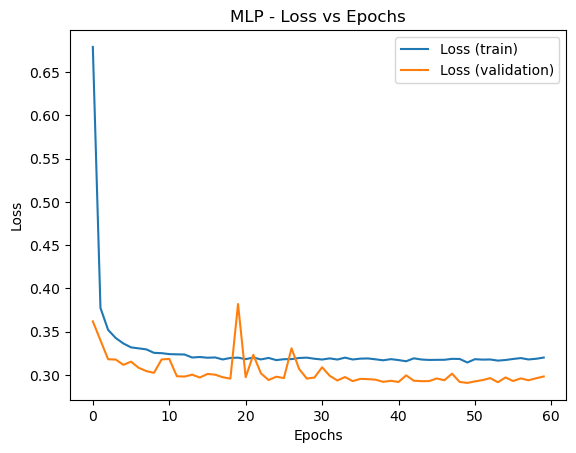

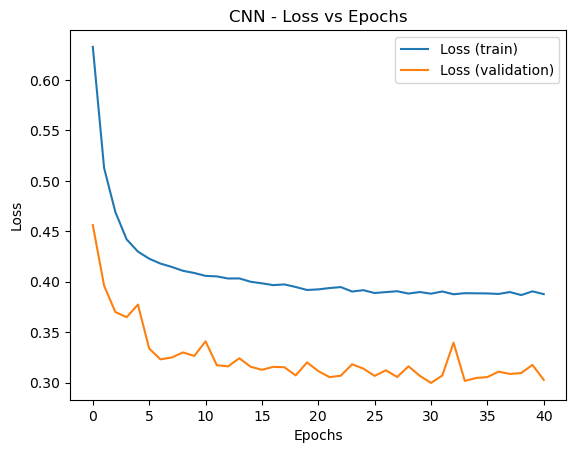

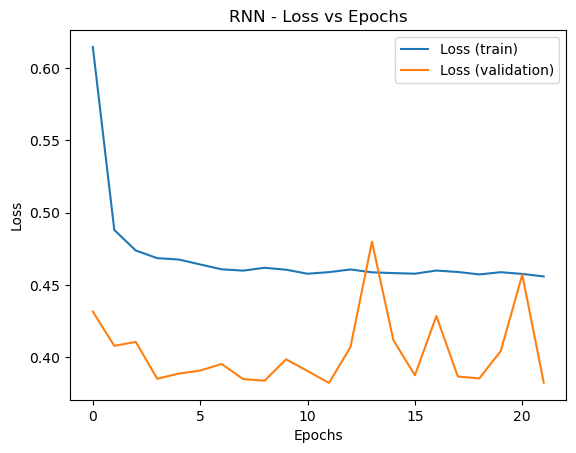

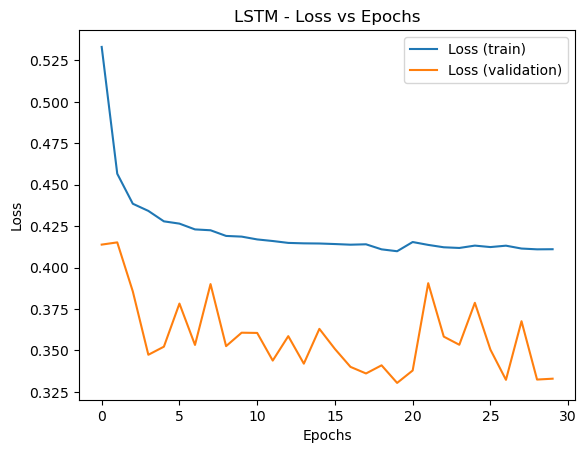

MLP - RMSE: 0.49957238249093044, R²: 0.7513225943408722, MSE: 0.2495725653476645
CNN - RMSE: 0.4993295389665862, R²: 0.7515643011362481, MSE: 0.24932998848458354
RNN - RMSE: 0.5637143895253247, R²: 0.6833658693597191, MSE: 0.3177739129579095
LSTM - RMSE: 0.5206248129414719, R²: 0.7299219991846253, MSE: 0.2710501958503426


In [30]:
# ===========================
# Plotting des résultats
# ===========================

# Fonction pour afficher les résultats
def plot_history(history, model_name):
    plt.plot(history.history['loss'], label='Loss (train)')
    plt.plot(history.history['val_loss'], label='Loss (validation)')
    plt.title(f'{model_name} - Loss vs Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

# Tracer les courbes de perte pour chaque modèle
plot_history(history_mlp, 'MLP')
plot_history(history_cnn, 'CNN')
plot_history(history_rnn, 'RNN')
plot_history(history_lstm, 'LSTM')

# Affichage des résultats de chaque modèle
print(f"MLP - RMSE: {rmse_mlp}, R²: {r2_mlp}, MSE: {mse_mlp}")
print(f"CNN - RMSE: {rmse_cnn}, R²: {r2_cnn}, MSE: {mse_cnn}")
print(f"RNN - RMSE: {rmse_rnn}, R²: {r2_rnn}, MSE: {mse_rnn}")
print(f"LSTM - RMSE: {rmse_lstm}, R²: {r2_lstm}, MSE: {mse_lstm}")


Malgré les ajustements effectués, tels que l'ajout de couches Dropout, l'utilisation d'early stopping, la réduction du taux d'apprentissage et l'augmentation du nombre d'époques, ces stratégies n'ont pas permis à tous les modèles de suivre la même tendance pour les courbes de validation et d'entraînement. Tous les modèles présentent des signes d'overfitting, bien que le modèle MLP montre un écart moins important entre les courbes d'entraînement et de validation. Cependant, on observe des pics et des creux dans la courbe de validation, ce qui suggère un taux d'apprentissage encore trop élevé, ce qui empêche une convergence stable et régulière.

# 4.Ajustements du modèle MLP

In [39]:
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

# ===========================
#  MLP (Perceptron multicouche)
# ===========================

def build_mlp(input_dim):
    model = Sequential()
    model.add(Input(shape=(input_dim,)))  
    model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.001)))  # Réduction de la régularisation L2
    model.add(Dropout(0.4))  # Dropout augmenté pour réduire le sur-apprentissage
    model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.001)))  # Réduction de la régularisation L2
    model.add(Dropout(0.4))  # Dropout augmenté
    model.add(Dense(16, activation='relu', kernel_regularizer=l2(0.001)))  # Réduction de la régularisation L2
    model.add(Dense(1))  # Régression
    model.compile(optimizer=Adam(learning_rate=0.0003), loss='mse', metrics=['mae'])  # Réduction du taux d'apprentissage
    return model

print("Training MLP model...")
mlp_model = build_mlp(X_train_top_30.shape[1])

# Early stopping pour éviter le sur-apprentissage
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)  # Patience augmentée

# Entraînement avec EarlyStopping
history_mlp = mlp_model.fit(X_train_top_30, y_train, epochs=100, batch_size=32, verbose=1, validation_data=(X_test_top_30, y_test), callbacks=[early_stopping])

# Prédictions et évaluation
y_pred_mlp = mlp_model.predict(X_test_top_30)
mse_mlp = mean_squared_error(y_test, y_pred_mlp)
rmse_mlp = np.sqrt(mse_mlp)
r2_mlp = r2_score(y_test, y_pred_mlp)

# Affichage des résultats
print(f"MLP - RMSE: {rmse_mlp}, R²: {r2_mlp}, MSE: {mse_mlp}")


Training MLP model...
Epoch 1/100
26215/26215 ━━━━━━━━━━━━━━━━━━━━ 35s 1ms/step - loss: 1.2441 - mae: 0.4961 - val_loss: 0.3810 - val_mae: 0.2423
Epoch 2/100
26215/26215 ━━━━━━━━━━━━━━━━━━━━ 34s 1ms/step - loss: 0.3803 - mae: 0.2577 - val_loss: 0.2951 - val_mae: 0.2290
Epoch 3/100
26215/26215 ━━━━━━━━━━━━━━━━━━━━ 34s 1ms/step - loss: 0.3107 - mae: 0.2413 - val_loss: 0.2755 - val_mae: 0.2282
Epoch 4/100
26215/26215 ━━━━━━━━━━━━━━━━━━━━ 34s 1ms/step - loss: 0.2907 - mae: 0.2372 - val_loss: 0.2720 - val_mae: 0.2301
Epoch 5/100
26215/26215 ━━━━━━━━━━━━━━━━━━━━ 37s 1ms/step - loss: 0.2849 - mae: 0.2346 - val_loss: 0.2731 - val_mae: 0.2359
Epoch 6/100
26215/26215 ━━━━━━━━━━━━━━━━━━━━ 34s 1ms/step - loss: 0.2804 - mae: 0.2315 - val_loss: 0.2747 - val_mae: 0.2388
Epoch 7/100
26215/26215 ━━━━━━━━━━━━━━━━━━━━ 34s 1ms/step - loss: 0.2756 - mae: 0.2292 - val_loss: 0.2776 - val_mae: 0.2422
Epoch 8/100
26215/26215 ━━━━━━━━━━━━━━━━━━━━ 35s 1ms/step - loss: 0.2723 - mae: 0.2281 - val_loss: 0.2765 - va

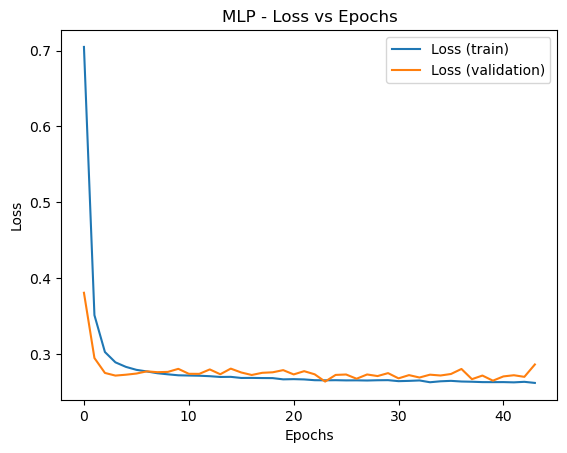

In [41]:
plot_history(history_mlp, 'MLP')

Le modèle MLP reste instable malgré les ajustements réalisés pour lutter contre le sur-apprentissage. On observe des oscillations dans la courbe de validation, ce qui indique une instabilité dans l'apprentissage du modèle. Par ailleurs, la courbe de validation suit exactement la courbe d'entraînement, ce qui peut être un signe que le modèle a tendance à mémoriser les données d'entraînement plutôt que d'apprendre de manière généralisée.
En conclusion, l'instabilité des courbes et l'absence d'amélioration du score R² montrent que le modèle MLP reste trop spécifique aux données d'entraînement et peine à généraliser efficacement, malgré les ajustements réalisés.